# test_bases

Test the bases.py module

Edit, in retrospect: looks like this isnt necessary, since QR decomposition gives us the exact same orthonormal basis, as Q; whilst simple matrix multiplication with the ~~basis matrix~~ __inverse of Q__ gives us the projection :-P  Nevertheless, this notebook serves to discover/demonstrate/reassure myself this is the case.

Let's redo the linear least squares projections, to test this module

beta_gt [ 0.30000001]
X.shape (10, 1)
y.shape (10,)


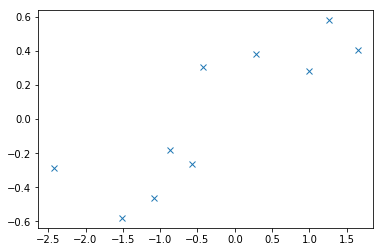

beta_est [ 0.25268061]


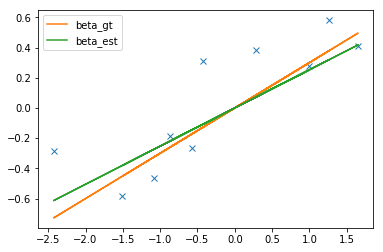

r_beta_gt [-0.13577723 -0.01894179  0.29827793 -0.1277804  -0.08879639 -0.08687026
  0.44118602  0.43735722  0.20081078  0.07723728]
r_beta_est [-0.18714862  0.028252    0.3116683  -0.19905737 -0.11617541 -0.00872526
  0.326357    0.41706133  0.26071413  0.03622364]
sum squares, beta_gt 0.571740043145
sum squares, beta_est 0.535889655606


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import bases


N = 10
K = 1

e = 0.2  # noise term
# _gt => 'ground truth'
beta_gt = np.array([0.3]).astype(np.float32)
print('beta_gt', beta_gt)

np.random.seed(123)
X = np.random.randn(N, K)
print('X.shape', X.shape)
y = X.dot(beta_gt) + np.random.randn(N) * e
print('y.shape', y.shape)


# simple X-y plot:
plt.plot(X[:, 0], y, 'x')
plt.show()

# _est => estimated
beta_est = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta_est', beta_est)

plt.plot(X[:, 0], y, 'x')
plt.plot(X[:, 0], X.dot(beta_gt), '-', label='beta_gt')
plt.plot(X[:, 0], X.dot(beta_est), '-', label='beta_est')
plt.legend()
plt.show()

# check residual for these two lines, compared to the actual X samples
r_beta_gt = y - X.dot(beta_gt)
r_beta_est = y - X.dot(beta_est)
print('r_beta_gt', r_beta_gt)
print('r_beta_est', r_beta_est)
print('sum squares, beta_gt', np.sum(np.power(r_beta_gt, 2)))
print('sum squares, beta_est', np.sum(np.power(r_beta_est, 2)))


I looked at this for a bit, since I couldnt figure out why the line for `beta_est` isnt a bit higher, on the right hand side.  Suddenly I remember: oh right: it has to pass through the origin.

In [33]:
import bases
import importlib
importlib.reload(bases)


B = bases.get_orthonormal_basis(X)
print('B', B)

# check columns of B are unit length:
print('norm B[:, 0]', np.linalg.norm(B[:, 0]))
assert abs(np.linalg.norm(B[:, 0]) - 1.0) <= 1e-4

# check first column of B, b0, is co-linear with x0
x0 = X[:, 0]
norm_x0 = np.linalg.norm(x0)
print('norm_x0', norm_x0)
x0_dot_b0 = x0.dot(B[:, 0])
print('x0_dot_b0', x0_dot_b0)
assert abs(norm_x0 - x0_dot_b0) <= 1e-4

B [[-0.27131537]
 [ 0.24925159]
 [ 0.07072058]
 [-0.37644565]
 [-0.14460088]
 [ 0.41271877]
 [-0.60646355]
 [-0.1071917 ]
 [ 0.31637648]
 [-0.21661143]]
norm B[:, 0] 1.0
norm_x0 4.00136038859
x0_dot_b0 4.00136038736


Ok, so finally we did nothing with the whole line-of-best-fit thing, just checked the basis was orthonormal, which is easy, since only once vector.  And checked that single vector was aligned with `x0`.

3 dimensions:

In [108]:
import bases
import importlib
importlib.reload(bases)


N = 30
K = 3

e = 0.2  # noise term


np.set_printoptions(suppress=True, precision=3)

# _gt => 'ground truth'
beta_gt = np.random.randn(K)
print('beta_gt', beta_gt)

np.random.seed(123)
X = np.random.randn(N, K)
print('X.shape', X.shape)
y = X.dot(beta_gt) + np.random.randn(N) * e
print('y.shape', y.shape)

X_orig = np.copy(X)
B = bases.get_orthonormal_basis(X)
assert np.max(np.abs(X_orig - X)) <= 1e-4
print('B.shape', B.shape)

# check columns of B are unit length:
for k in range(K):
    print('norm B[:, %s]' % k, np.linalg.norm(B[:, k]))
    assert abs(np.linalg.norm(B[:, k]) - 1.0) <= 1e-4

# check each B[:, k] orthogonal to B[:, k2] for k in range(K), k2 in range(K)
for k1 in range(K):
    for k2 in range(K):
        bk1_dot_bk2 = B[:, k1].dot(B[:, k2])
        if k1 == k2:
            assert abs(bk1_dot_bk2 - 1) <= 1e-4
        else:
            assert abs(bk1_dot_bk2 - 0) <= 1e-4

print('B.T.dot(B)', B.T.dot(B))
assert np.max(np.abs(B.T.dot(B) - np.identity(K))) <= 1e-4


# check that the basis does in fact correspond to the columnspace of X, ie
# if we project each column of X into this basis, then map back into
# the original vector space of X, we retrieve the same vectors
for k in range(K):
    xk = X[:, k]
    proj = bases.proj_orthonorm(xk, B)
    print('proj', proj)
    assert len(proj.shape) == 1
    assert proj.shape[0] == K
    # transform back into original space, and check the same
    xk_2 = B.dot(proj)
    assert np.max(np.abs(xk_2 - xk)) <= 1e-4


loading bases
beta_gt [-0.276 -0.552  0.121]
X.shape (30, 3)
y.shape (30,)
B.shape (30, 3)
norm B[:, 0] 1.0
norm B[:, 1] 1.0
norm B[:, 2] 1.0
B.T.dot(B) [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
proj [ 5.729  0.    -0.   ]
proj [-0.693  7.118  0.   ]
proj [-1.59   1.508  5.453]


The results of the projection, ie the triangular form of the resulting projections, look suspiciously simliar to QR.  Is it the same thing?

In [94]:
Q, R = np.linalg.qr(X)
print('Q', Q)
print('R', R)
print('B', B)


Q [[-0.189  0.122  0.037]
 [-0.263 -0.107 -0.256]
 [-0.424 -0.101 -0.137]
 [-0.151 -0.11   0.031]
 [ 0.26  -0.064 -0.012]
 [-0.076  0.303 -0.295]
 [ 0.175  0.071 -0.167]
 [ 0.26  -0.106 -0.321]
 [-0.219 -0.111 -0.133]
 [-0.249 -0.044  0.219]
 [-0.045 -0.397  0.228]
 [-0.122  0.118  0.1  ]
 [ 0.     0.097  0.188]
 [ 0.05  -0.108  0.272]
 [-0.068  0.074 -0.022]
 [-0.002  0.336  0.018]
 [ 0.171  0.331  0.279]
 [-0.181  0.227  0.262]
 [ 0.005  0.151 -0.123]
 [ 0.306  0.24  -0.219]
 [-0.135  0.099  0.009]
 [-0.231  0.177 -0.032]
 [ 0.008 -0.032  0.209]
 [ 0.035  0.069  0.161]
 [ 0.203 -0.134  0.293]
 [ 0.181 -0.039 -0.041]
 [-0.146 -0.24  -0.254]
 [-0.12   0.222 -0.052]
 [-0.055 -0.158  0.107]
 [-0.212  0.273  0.107]]
R [[ 5.729 -0.693 -1.59 ]
 [ 0.     7.118  1.508]
 [ 0.     0.    -5.453]]
B [[-0.189  0.122 -0.037]
 [-0.263 -0.107  0.256]
 [-0.424 -0.101  0.137]
 [-0.151 -0.11  -0.031]
 [ 0.26  -0.064  0.012]
 [-0.076  0.303  0.295]
 [ 0.175  0.071  0.167]
 [ 0.26  -0.106  0.321]
 [-0.219

Interesting: Q,R decomposition actually creates the basis for us.  Quoting from https://en.wikipedia.org/wiki/QR_decomposition:

"More generally, the first k columns of Q form an orthonormal basis for the span of the first k columns of A for any 1 ≤ k ≤ n."

Lets simply check that the beta we get by projecting $\mathbf{y}$ into this space matches that we get from the matrix inversion formula.

In [134]:
y_proj_B = y.dot(B)
print('y_proj_B', y_proj_B)
norm_y_proj_B = np.linalg.norm(y_proj_B)
print('norm y_proj_B', norm_y_proj_B)

beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta', beta)

y_proj_B [-1.393 -4.026  0.31 ]
norm y_proj_B 4.271708272
beta [-0.297 -0.578  0.057]


Hmmmm, what to do with the y projection onto B, to get beta?  I suppose we need to decompose it into a basis formed from the column space of $\mathbf{X}$?

__Edit, in retrospect: the following bit, down as far as what follows "At this point I reached out to ...", doesnt work :-P, so you can simply skip to that bit, if you want to save reading all the stuff that didnt work for me.__

Lets label the following bases:

- basis `B`, as calculated above, the orthonormal basis
- basis `Bx`, which is the basis defined by the projection of the column vectors of $\mathbf{X}$ into vector space defined by basis `B`

Let's first get the projection of $\mathbf{X}$ into `B`.  To make sure we're getting the transposes right, lets try two columns first:

In [110]:
# Bx = X[:2].T.dot(B)
Bx2 = B.T.dot(X[:, :2])
print('Bx2', Bx2)

Bx [[ 5.729 -0.693]
 [ 0.     7.118]
 [-0.     0.   ]]


And all three columns:

In [111]:
Bx = B.T.dot(X)
print('Bx', Bx)

Bx [[ 5.729 -0.693 -1.59 ]
 [ 0.     7.118  1.508]
 [-0.     0.     5.453]]


... which matches the $\mathbf{R}$, from the QR decomposition earlier.

Thinking about this projection:

- the first column represents the projection of `x0` into `B`. And since `B` was formed using the direction of `x0` as the first basis vector, so this vector is exactly aligned with the first basis vector, just the magnitude changes
- then, the second column represents the projection of `x1` into `B`, which lies on the hyperplane formed by basis vectors `b0` and `b1`
- and similarly, `x2` lies on the hyperplane formed by basis vectors `b0`, `b1` and `b2`

So, in the basis space `Bx`, the three columns are the projection of:

- $[1, 0, 0]$
- $[0, 1, 0]$
- $[0, 0, 1]$

which as a matrix of column vectors is:

$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

... and we can map from basis `Bx` to basis `B` by multiplying by matrix `R`:

$$
\mathbf{M}_{Bx} \mapsto_{B} \mathbf{R}\mathbf{M}
$$

For example:

In [114]:
print(R.dot(np.array([1, 0, 0]).reshape(3, 1)))

[[ 5.729]
 [ 0.   ]
 [ 0.   ]]


In [115]:
print(R.dot(np.array([0, 1, 0]).reshape(3, 1)))

[[-0.693]
 [ 7.118]
 [ 0.   ]]


In [116]:
print(R.dot(np.array([0, 0, 1]).reshape(3, 1)))

[[-1.59 ]
 [ 1.508]
 [-5.453]]


... and therefore we can map in the reverse direction, from basis `B` to basis `Bx`, by multiplying by the inverse of $\mathbf{R}$:

In [117]:
Rinv = np.linalg.inv(R)
print(Rinv.dot(np.array([-0.693, 7.118, 0]).reshape(3, 1)))

[[ 0.]
 [ 1.]
 [ 0.]]


In [118]:
print(Rinv.dot(np.array([-1.59, 1.508, -5.453]).reshape(3, 1)))

[[-0.]
 [-0.]
 [ 1.]]


.... and so we can transform the projection of $\mathbf{y}$ into basis `Bx`, by multiplying by the inverse of $\mathbf{R}$:

In [138]:
y_proj_Bx = Rinv.dot(y_proj_B.reshape(3, 1))
print('y_proj_Bx', y_proj_Bx)
print('beta', beta)
print('R.dot(y_proj_B)', R.dot(y_proj_B))
# print('R.dot')
print('B.T.dot(y.reshape(3, 1))', B.T.dot(y.reshape(N, 1)))
print('Rinv.dot(B.T.dot(y.reshape(3, 1)))', Rinv.dot(B.T.dot(y.reshape(N, 1))))


y_proj_Bx [[-0.326]
 [-0.554]
 [-0.057]]
beta [-0.297 -0.578  0.057]
R.dot(y_proj_B) [ -5.681 -28.194  -1.69 ]
B.T.dot(y.reshape(3, 1)) [[-1.393]
 [-4.026]
 [ 0.31 ]]
Rinv.dot(B.T.dot(y.reshape(3, 1))) [[-0.326]
 [-0.554]
 [-0.057]]


Not quite working, so we probably need to do some actual maths for a bit :-P

We have:

$$
\mathbf{X} = \mathbf{Q}\mathbf{R}
$$

... where:

- $\mathbf{Q}$ is an $N$ by $K$ matrix
- $\mathbf{R}$ is a $K$ by $K$ matrix

Looking at $\mathbf{Q}$:

- $\mathbf{Q}$ has unit vectors as its columns
- And they are orthogonal
- This means the dot product of any column with itself is 1 (since each column vector is unit length)
- and the dot product of any column with another column is 0 (since each column vector is orthogonal to the others)
- and thus $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$

Looking at $\mathbf{R}$:

- it's upper triangular
- it's square

All three matrices, $\mathbf{X}$, $\mathbf{Q}$ and $\mathbf{R}$ are of rank $K$, I think.

Looking at $\mathbf{X} = \mathbf{Q}\mathbf{R}$, we can think of this as a mapping, or a projection, between two vector spaces, where $\mathbf{Q}$ is the projection matrix.  $\mathbf{Q}$ is projecting from a space of dimension $K$ to a codomain of dimension $N$.  However the range of $\mathbf{Q}$ has dimension $K$ (I think).  And I guess the null-space of $\mathbf{Q}$ has dimension $N - K$?

#### Treating $\mathbf{Q}$ as a projection matrix

A projection matrix is a linear map, from the domain, into the codomain.  In the case of $\mathbf{Q}$, the domain has dimensionality $K$, and the codomain has dimensionality $N$.  However, the image cannot have dimensionality more than the domain, and the image should have a dimensionality matching the rank of the projection matrix (I think), ie in this case: $K$.  Then, the nullspace has dimension $N - K$.

Let's call the $N$-dimensional vector space, containing $\mathbf{y}$ and the column vectors of $\mathbf{X}$, $U$.  And the columnspace of $\mathbf{X}$ $V$.  $V$ is a subspace of $U$.

Actually... after re-reading a bit some of the chapters on linear maps and projection in Jim Hefferon's book, I'm thinking, maybe it is clear to leave everything in the same $N$-dimensional space, and just change bases?  So, when we calculate $Q$ and $R$, in numpy rather than using the default `mode` of `reduced`, we can use the `mode` of `complete`, which wont change the dimensionality.  In this case $\mathbf{Q}$ will be $N$ by $N$, and $R$ will ~~be also N by N~~ apparently it is $N$ by $K$, in fact:


In [139]:
Q, R = np.linalg.qr(X, mode='complete')
print('Q', Q)
print('R', R)
print('B', B)

Q [[-0.189  0.122  0.037 -0.129  0.271 -0.041  0.212  0.396 -0.133 -0.309
  -0.026 -0.185 -0.093 -0.025 -0.076 -0.094 -0.022 -0.329  0.012  0.315
  -0.158 -0.256 -0.061 -0.044  0.121  0.2    0.014 -0.153 -0.052 -0.312]
 [-0.263 -0.107 -0.256 -0.148  0.023  0.247  0.117 -0.023 -0.174 -0.114
  -0.374  0.073  0.094 -0.077  0.046  0.309  0.365  0.158  0.137  0.312
   0.048  0.088 -0.022  0.079 -0.052  0.02  -0.273  0.164 -0.16   0.186]
 [-0.424 -0.101 -0.137 -0.006  0.096 -0.348 -0.097 -0.168 -0.175  0.111
   0.264  0.021  0.147  0.28  -0.059 -0.052  0.243  0.12  -0.137 -0.13
  -0.061 -0.147  0.193  0.141  0.359  0.038 -0.23  -0.133  0.105 -0.037]
 [-0.151 -0.11   0.031  0.968  0.03   0.041  0.044  0.053 -0.028 -0.056
  -0.06  -0.014 -0.007 -0.026 -0.001  0.028  0.028 -0.027  0.024  0.08
  -0.01  -0.013 -0.019 -0.003 -0.01   0.024 -0.019  0.008 -0.03  -0.014]
 [ 0.26  -0.064 -0.012  0.024  0.939  0.019 -0.043 -0.089  0.025  0.065
  -0.008  0.044  0.024  0.002  0.019  0.032  0.016  0.079  0

Presumably the columns of $\mathbf{Q}$ are still unit length and orthogonal?

In [140]:
print(Q.T.dot(Q))

[[ 1. -0. -0.  0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0.
  -0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0.]
 [-0.  1.  0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0.
  -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0.]
 [-0.  0.  1. -0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
   0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0. -0.]
 [ 0.  0. -0.  1. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.
  -0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0.]
 [-0.  0.  0. -0.  1. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0.
  -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.]
 [ 0. -0.  0. -0. -0.  1. -0.  0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.
   0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0.]
 [-0.  0.  0. -0.  0. -0.  1. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.
   0. -0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.]
 [ 0.  0.  0. -0.  0.  0. -0.  1. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0.
   0.  0.  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.]


... Yes

So, now $\mathbf{Q}$ is a projection onto the original $N$-dimensional vector space.  The range space has dimension $K$, and the null space has dimension $N - K$.  The projection of $\mathbf{R}$ by $\mathbf{Q}$ gives $\mathbf{X}$.  $\mathbf{R}$ comprises three vectors, each of which are projected to one of the column vectors of $\mathbf{X}$.  The standard basis for $N$-dimensions is $\epsilon_N$.  Let's use $\mathbf{Q}$ as a set of bases vectors, and denote each basis vector as $\mathbf{q}_1, \mathbf{q}_2,\dots,\mathbf{q}_N$.  Then we have the following:

$$
\mathrm{Rep}_{\mathbf{Q}}(\mathbf{Q}) = \mathbf{I}
$$

What is $\mathrm{Rep}_{\mathbf{Q}}(\mathbf{X})$? I guess it should be $\mathbf{R}$?  But how to show this mathematically?

$\mathbf{X}$ is $\mathrm{Rep}_{\mathbf{\epsilon}_N}(\mathbf{X})$.  Can we create a matrix that maps from basis $\mathbf{\epsilon}_N$ into basis $\mathbf{Q}$? Following Hefferon's book ,chapter "Changin representations of vectors", we want perhaps:

$$
\mathrm{Rep}_{\mathbf{\epsilon}_N, \mathbf{Q}}(\mathrm{id})
$$

ie, we want the change of basis matrix, from basis $\mathrm{\epsilon}_N$ to basis $\mathbf{Q}$.  It should be calculated as:

$$
\mathrm{Rep}_{\mathbf{\epsilon}_N, \mathbf{Q}}(\mathrm{id})
=
\begin{bmatrix}
\mathrm{Rep}_{\mathbf{Q}}(\mathbf{e}_1) & \mathrm{Rep}_{\mathbf{Q}}(\mathbf{e}_2) & \dots & \mathrm{Rep}_{\mathbf{Q}}(\mathbf{e}_N) \\
\end{bmatrix}
$$

I suspect that this matrix is going to end up being the inverse of $\mathbf{Q}$, in order words $\mathbf{Q}^T$, but I cant quite see how to prove that.  But perhaps going the other way, ie $\mathrm{Rep}_{\mathbf{Q},\mathbf{\epsilon}_N}$ will be $\mathbf{Q}$, and not involve inversion/transpose?

$$
\mathrm{Rep}_{\mathbf{Q},\mathbf{\epsilon}_N}
= 
$$

Lets go from statement (5) of theorem 2.20 from the Hefferon book:

"(5) If $<\mathbf{\beta}_1,\dots,\mathbf{\beta}_n>$ is a basis for $V$ then $<h(\mathbf{\beta}_1),\dots,h(\mathbf{\beta}_n)>$ is a basis for $\mathcal{R}(h)$"

So, let's look at the effect of $\mathbf{Q}$ on $e_1, e_2, ...$:

$$
\mathbf{Q}\mathbf{e}_1 = \mathbf{q}_1
$$
&nbsp;

$$
\mathbf{Q}\mathbf{e}_2 = \mathbf{q}_2
$$
&nbsp;

etc ...

So, if $\mathbf{Q}$ represnets a mapping $\mathcal{R}^N \rightarrow \mathcal{R}^N$, then we can use $\mathbf{q}_1, \mathbf{q}_2, \dots, \mathbf{q}_N$ as a basis for the the range space of this mapping.

If $\mathbf{Q}$ represents a mapping from $\mathbf{\epsilon}_N$ to $\mathbf{\epsilon}_N$, then the mapping matrix is simply $\mathbf{Q}$.


At this point I reached out to http://math.stackexchange.com/questions/340978/change-of-basis-matrix-to-convert-standard-basis-to-another-basis/340991#340991 and  https://en.wikipedia.org/wiki/Change_of_basis ...

Combining these somewhat, if we have some matrix $\mathbf{M}$, whose columns are the new basis, let's call the basis $\mathbf{F}$, then $\mathbf{M}$ is the matrix of the linear map, and let's say $\mathbf{M}$ is $N$ by $N$, so:

$$
Id: (\mathbb{R}^N, \mathbf{F}) \rightarrow (\mathbb{R}^N, \mathbf{\epsilon}_N)
$$

This makes sense: if we take standard vector $\mathbf{x} = \mathbf{e}_1$, and multiply it by $\mathbf{M}$, we will obtain the first column of $\mathbf{M}$.  So, if $\mathbf{x}$ is in the $\mathbf{M}$ basis, we get the coordinates of $\mathbf{x}$ in standard basis, as required.  Ditto for $x = \mathbf{e}_2$, $\mathbf{x} = \mathbf{e}_3$, etc.

So:

$$\mathrm{Rep}_{\mathbf{F}, \mathbf{\epsilon}_N}(\mathbf{x}) = \mathbf{M}\mathbf{x}
$$

Conversely, if we want to map from standard basis to basis $\mathbf{F}$, we should invert the transformation, ie multiply by the inverse of $\mathbf{M}$:

$$\mathrm{Rep}_{\mathbf{\epsilon}_N, \mathbf{F}}(\mathbf{x}) = \mathbf{M}^{-1}\mathbf{x}
$$



Let's go back to the "reduced" Q,R matrix, where $\mathbf{Q}$ is $N$ by $K$, and $\mathbf{R}$ is $K$ by $K$.  Let's say that $\mathbf{Q}$ represents a mapping $q$ from basis $F$ in vector space $V$ to basis $E$ in vectors space $U$.  $\mathbf{Q}$ has $K$ columns, and $N$ rows, so it's a mapping from a $K$-dimensional domain to an $N$-dimensional codomain.  Let's say the codomain, $U$ is the $N$-dimensional space containing $\mathbf{X}$ vectors and $\mathbf{y}$. Note that the vector space spanned by $\mathbf{X}$ is a $K$-dimensional subspace of $U$.  Can we prove that the range of $q$ is the vector space spanned by $\mathbf{X}$?  Let's call the vector space spanned by $\mathbf{X}$ $W$.

Can we prove that $\mathcal{R}(q) = W$?

Let's look at the image of the standard basis vectors $\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_K$ of the vector space $V$.  The mapping $q$, represented by $\mathbf{Q}$, will map them to $\mathbf{Q}$

$$
\mathrm{Rep}_{\mathbf{E}_K}(\mathbf{I}) \mapsto_q \mathrm{Rep}_{\mathbf{E}_N}(\mathbf{Q})
$$
&nbsp;

$$
q: \mathrm{Rep}_{\mathbf{E}_K}(\mathbf{I}) \rightarrow \mathrm{Rep}_{\mathbf{E}_N}(\mathbf{Q})
$$

Since $\mathbf{X} = \mathbf{Q}\mathbf{R}$, and rank $\mathbf{Q}$ is $K$, equals the rank of $\mathbf{X}$, so the columnspace spanned by $\mathbf{Q}$ must match that spanned by $\mathbf{X}$. So the range of mapping $q$ is $W$, the vector space spanned by the columnspace of $\mathbf{X}$.

$\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$, so we can reverse the mapping using $\mathbf{Q}^T$. Note that the inverse mapping is a projection, from $N$-dimensions to $K$-dimensions, where $N > K$, so the inverse mapping does not itself have an inverse.  ie, it is not true to say that $\mathbf{Q}\mathbf{Q}^T = \mathbf{I}$.

The inverse mapping is:

$$
q^{-1}: \mathrm{Rep}_{\mathbf{E}_N}(\mathbf{Q}) \rightarrow \mathrm{Rep}_{\mathbf{E}_K}(\mathbf{I})
$$

ie, $\mathbf{Q}^T$ maps from vector space $U$ to vector space $V$, using the standard basis in each vector space.

What is $\mathbf{Q}^T\mathbf{X}$?  It wont map to $\mathbf{I}$ in general, since in general $\mathbf{X}$ is not orthonormal, therefore $\mathbf{Q} \ne \mathbf{X}$, and $\mathrm{Rep}_{\mathbf{E}_N}(\mathbf{Q}^T\mathbf{Q}) \rightarrow_{q^{-1}} (\mathrm{Rep}_{\mathbf{E}_K}\mathbf{I})$, so $\mathbf{Q}^T\mathbf{X}$ cannot itself map to $\mathbf{X}$.  We have:

$$
\mathbf{X} = \mathbf{Q}\mathbf{R}
$$

Therefore:

$$
\mathbf{Q}^T\mathbf{X} = \mathbf{Q}^T\mathbf{Q}\mathbf{R}
$$

But $\mathbf{Q}$ is orthonormal, so $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$, so:

$$
\mathbf{Q}^T\mathbf{X} = \mathbf{R}
$$

Therefore:

$$
q^{-1}: \mathrm{Rep}_{\mathbf{E}_N}(\mathbf{X}) \rightarrow \mathrm{Rep}_{\mathbf{E}_K}(\mathbf{R})
$$

Lets recheck some of this numerically:

In [145]:
Q, R = np.linalg.qr(X, mode='reduced')

print('R\n', R)
print('Q.T.dot(X)\n', Q.T.dot(X))

R
 [[ 5.729 -0.693 -1.59 ]
 [ 0.     7.118  1.508]
 [ 0.     0.    -5.453]]
Q.T.dot(X)
 [[ 5.729 -0.693 -1.59 ]
 [ 0.     7.118  1.508]
 [-0.     0.    -5.453]]


$\mathbf{Q}^T\mathbf{X}$ matches $\mathbf{R}$.  A good start :-)

Next, to calculate $\beta$, we're going to project $\mathbf{y}$ into vector space $V$, using $\mathbf{Q}^T$.  Let's denote this projection of $\mathbf{y}$ by $\mathbf{\hat{y}}$.  We want to minimize the residuals:

$$
\mathbf{r} = \mathbf{y} - \mathbf{X}\mathbf{\beta}
$$

We're going to project $\mathbf{y}$ orthogonally into the subspace spanned by the columns of $\mathbf{X}$, giving $\mathbf{\hat{y}}$, and set the difference to $\mathbf{0}$:

$$
\mathbf{X}\mathbf{\beta} = \mathbf{\hat{y}}
$$

The projection from $U$ to $V$ for $\mathbf{y}$ is:

$$
q^{-1}: \mathrm{Rep}_{\mathbf{E}_N}(\mathbf{y}) \rightarrow \mathrm{Rep}_{\mathbf{E}_K}(\mathbf{Q}^T\mathbf{y})
$$

Let's try applying $\mathbf{Q}^T$ to the expression for the residual:

$$
\mathrm{Q}^T\mathbf{r} = \mathrm{Q}^T\mathbf{y} - \mathrm{Q}^T\mathbf{X}\mathbf{\beta}
$$


Since the residual vector $\mathbf{r}$ is orthogonal to the columnspace of $\mathbf{X}$, and therefore in the null space of the projectoin $\mathbf{Q}^T$, so:

$$\mathbf{Q}^T\mathbf{r} = \mathbf{0}$$

In addition:

$$\mathbf{Q}^T\mathbf{y} = \mathbf{\hat{y}}$$

So, we have:

$$
\mathbf{Q}^T\mathbf{X}\mathbf{\beta} = \mathbf{Q}^T\mathbf{y}
$$

Therefore:

$$
\mathbf{\beta} = (\mathbf{Q}^T\mathbf{X})^{-1} \mathbf{Q}^T\mathbf{y}
$$

Lets try this:

In [146]:
beta_attempt = np.linalg.inv(Q.T.dot(X)).dot(Q.T.dot(y))
print('beta_attempt\n', beta_attempt)
print('beta\n', beta)

beta_attempt
 [-0.297 -0.578  0.057]
beta
 [-0.297 -0.578  0.057]


Matches.  Yay :-)

Can we relate $(\mathbf{Q}^T\mathbf{X})^{-1}$ to $\mathbf{R}$ somehow?  We have:

$$
\mathbf{X} = \mathbf{Q}\mathbf{R}
$$


So:

$$
\mathbf{Q}^T\mathbf{X} = \mathbf{R}
$$

So:

$$
(\mathbf{Q}^T\mathbf{X})^{-1} = \mathbf{R}^{-1}
$$

So, that might hopefully mean that:

$$
\beta = \mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}
$$

Let's try that:

In [147]:
beta_attempt = np.linalg.inv(R).dot(Q.T.dot(y))
print('beta_attempt\n', beta_attempt)
print('beta\n', beta)

beta_attempt
 [-0.297 -0.578  0.057]
beta
 [-0.297 -0.578  0.057]


Matches. Yay :-)

## Graphical projection of the data

Let's do the graphical projection, for K=2

beta_gt [ 0.288 -0.463]
X.shape (30, 2)
y.shape (30,)
y_proj [ 2.782 -2.117]
X_proj [[ 5.368 -2.179]
 [-0.     5.065]]
beta_inv [ 0.349 -0.418]
beta_qr_ish [ 0.349 -0.418]
scaled_max_range 9.0


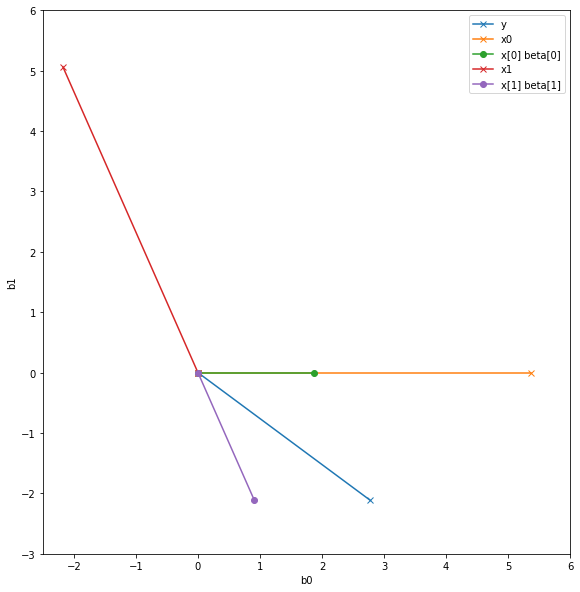

In [176]:
import mylib
import importlib
importlib.reload(mylib)
import matplotlib.pyplot as plt


N = 30
K = 2

e = 0.2  # noise term


np.random.seed(124)
np.set_printoptions(suppress=True, precision=3)

# _gt => 'ground truth'
beta_gt = np.random.randn(K)
print('beta_gt', beta_gt)

X = np.random.randn(N, K)
print('X.shape', X.shape)
y = X.dot(beta_gt) + np.random.randn(N) * e
print('y.shape', y.shape)

Q, R = np.linalg.qr(X)
y_proj = Q.T.dot(y)
print('y_proj', y_proj)
X_proj = Q.T.dot(X)
print('X_proj', X_proj)
# mylib.plot_vector()

beta_inv = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta_inv', beta_inv)
beta_qr_ish = np.linalg.inv(R).dot(Q.T.dot(y))  # 'ish', since this isnt the 'official' way to use QR to get beta
print('beta_qr_ish', beta_qr_ish)

mylib.proportional_axes(xlim=[-2.5, 6], ylim=[-3, 6])
mylib.plot_vector(y_proj, '-x', label='y')
for k in range(K):
    mylib.plot_vector(X_proj[:, k], '-x', label='x%s' % k)
    mylib.plot_vector(X_proj[:, k] * beta_qr_ish[k], '-o', label='x[%s] beta[%s]' % (k, k))
plt.legend()
plt.xlabel('b0')
plt.ylabel('b1')
plt.show()

Seems plausible looking :-)  We can see:

- $\mathbf{x}_0$ and $\mathbf{x}_1$ are not colinear
- nor are $\mathbf{x}_0$, $\mathbf{x}_1$, $\mathbf{y}$ colinear
- $\mathbf{x}_0\beta_0 + \mathbf{x}_1\beta_1$ looks plausibly like it equals $\mathbf{y}$

Lets retry the beta solving, using QR, without doing an explicit inversion of R, which is upper-triangular after all:

In [184]:
# what we had before:
# beta_qr_ish = np.linalg.inv(R).dot(Q.T.dot(y))

# so:
# - transposing Q is harmless enough
# - matrix multiplication with y seems reasonable
# - we can use a triangular solver instead of inverting R:

import scipy.linalg

beta_qr = scipy.linalg.solve_triangular(R, Q.T.dot(y))
print('beta_qr', beta_qr)
print('beta_inv', beta_inv)


beta_qr [ 0.349 -0.418]
beta_inv [ 0.349 -0.418]


Matches, and avoids forming the inverse of $\mathbf{R}$, so seems ok-ish?

... and... checking wikipedia https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29  seems it is in fact the official way :-)  wikipedia states:


![](img/wiki_qr.png)

... which matches the formula above.